In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [82]:
np.random.seed(42)
def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        return np.random.uniform(mu - sigma/math.sqrt(3),mu + sigma/math.sqrt(3),n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")
print(y_test)

[ 0.04967142 -0.01382643  0.06476885  0.15230299 -0.02341534]


In [83]:
y1 = generate_random_numbers(105, 0.5, 20.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")
print(np.mean(y1))
print(np.mean(y2))

-2.0093411671336154
0.48688467493601006


In [84]:
# IGD, the ordering is permitted to have replacement. 
#
#

def IGD_wr_task1(y):
    
    def objf(x):
        return 1/2*norm(x-y)**2

    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    x = 0
    f_list = []
    
    for k in range(len(ordering)):
        f_list.append(objf(x))
        ga = 1/(k+1)
        x = x - ga*(x-y[ordering[k]])

        
    return x,f_list
    
    
    
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.

In [85]:
x,f_list = IGD_wr_task1(y1)
print("x = ",x)
#print(np.amin(f_list))
print("f = ",f_list[-1])

x =  -0.9841443610442078
f =  17048.391842544646


In [86]:
x,f_list = IGD_wr_task1(y2)
print("x = ",x)
#print(np.amin(f_list))
print("f = ",f_list[-1])

x =  0.4784347462308966
f =  5.94987896538271


In [87]:
# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    
    def objf(x):
        return 1/2*norm(x-y)**2
    
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    
    x = 0
    f_list = []
    
    for k in range(len(ordering)):
        f_list.append(objf(x))
        ga = 1/(k+1)
        x = x - ga*(x-y[ordering[k]])
        
    return x,f_list
        
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.




In [88]:
x,f_list = IGD_wo_task1(y1)
print("x = ",x)
#print(np.amin(f_list))
print("f = ",f_list[-1])


x =  -2.009341167133616
f =  16962.003902600816


In [89]:
x,f_list = IGD_wo_task1(y2)
print("x = ",x)
#print(np.amin(f_list))
print("f = ",f_list[-1])

x =  0.4868846749360101
f =  5.946069351590135


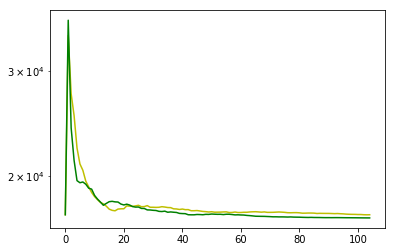

In [90]:
his = np.mean([IGD_wr_task1(y1)[1] for c in range(30)],axis=0)
her = np.mean([IGD_wo_task1(y1)[1] for c in range(30)],axis=0)

plt.semilogy(his,color='y')
plt.semilogy(her,color='g')
plt.show()

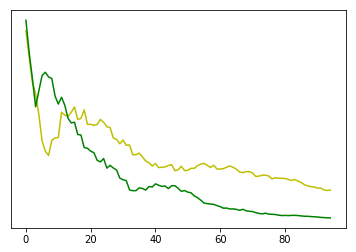

In [91]:
# closer look
plt.semilogy(his[10::],color='y')
plt.semilogy(her[10::],color='g')
plt.show()

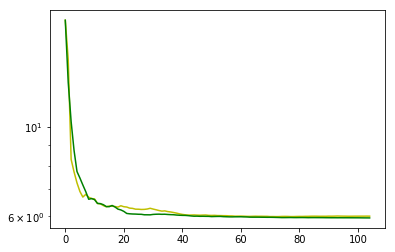

In [92]:
his = np.mean([IGD_wr_task1(y2)[1] for c in range(30)],axis=0)
her = np.mean([IGD_wo_task1(y2)[1] for c in range(30)],axis=0)

plt.semilogy(his,color='y')
plt.semilogy(her,color='g')

plt.show()

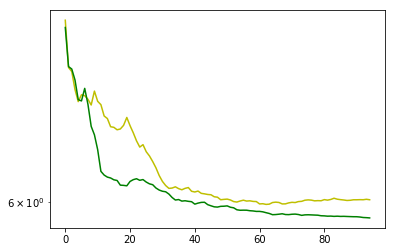

In [93]:
# closer look
plt.semilogy(his[10::],color='y')
plt.semilogy(her[10::],color='g')

plt.show()

In [94]:
# Conclusion: IGD without replacement performs better.

In [95]:
beta = np.random.uniform(1.0,2.0,size=30)

In [96]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task2(y,beta):   
    
    def objf(x):
        a = (x-y)**2
        return 1/2*np.sum(a*np.array(beta))
    
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)
    x = 0
    f_list = []
    
    ga = 0.03/np.amin(beta)
    
    for k in range(len(ordering)):
        f_list.append(objf(x))
        x = x - ga*beta[ordering[k]]*(x-y)
        
    return x,f_list       
    
    
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.

In [97]:
x,f_list = IGD_wr_task2(1,beta)
print("x = ",x)
#print(np.amin(f_list))
print("f = ",f_list[-1])

x =  0.7290058545443792
f =  1.865202875072368


In [98]:
# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(y,beta):
    
    def objf(x):
        a = (x-y)**2
        return 1/2*np.sum(a*np.array(beta))
    
    n = len(beta)
    ordering = np.random.choice(n, n, replace=False)
    x = 0
    f_list = []
    
    ga = 0.03/np.amin(beta)
    
    for k in range(len(ordering)):
        f_list.append(objf(x))
        x = x - ga*beta[ordering[k]]*(x-y)
        
        
    return x,f_list    
    
    
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.

In [99]:
x,f_list = IGD_wo_task2(1,beta)
print("x = ",x)
#print(np.amin(f_list))
print("f = ",f_list[-1])

x =  0.727820164645131
f =  1.8165425419959655


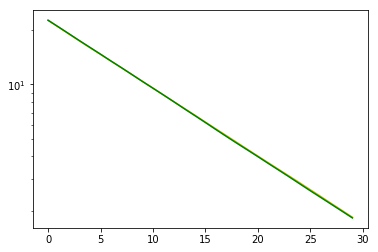

In [100]:
his = np.mean([IGD_wr_task2(1,beta)[1] for c in range(220)],axis=0)
her = np.mean([IGD_wo_task2(1,beta)[1] for c in range(220)],axis=0)

plt.semilogy(his,color='y')
plt.semilogy(her,color='g')

plt.show()
# plt.plot(IGD_wr_task2(1,beta)[1],color='y')
# plt.plot(IGD_wo_task2(1,beta)[1],color='g')
# plt.show()

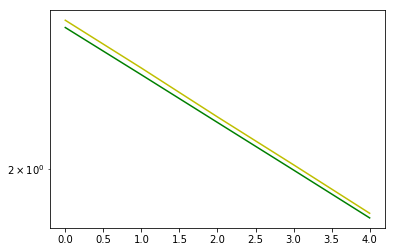

In [101]:
# closer look
plt.semilogy(his[25::],color='y')
plt.semilogy(her[25::],color='g')

plt.show()

In [ ]:
# Conlusion: IGD without replacement performs better.

In [102]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

In [103]:
# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [104]:
xstar.shape

(100,)

In [105]:
y.shape

(200,)

In [106]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A):
    
    AT = A.T
    def objf(x):
        return norm(A@x - y)**2
    
    n = A.shape[1]
    ordering = np.random.choice(n,n,replace=True)
    x = np.zeros(len(xstar))
    f_list = []
    x_list = []
    
    ga = 1e-3
    for k in range(len(ordering)):
        x_list.append(x)
        f_list.append(objf(x))
        
        x = x - ga*A[ordering[k]]*(np.dot(A[ordering[k]],x) - y[ordering[k]])
        
    return x,f_list,x_list
            
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A):
    
    AT = A.T
    def objf(x):
        return norm(A@x - y)**2
    
    n = A.shape[1]
    ordering = np.random.choice(n,n,replace=False)
    x = np.zeros(len(xstar))
    f_list = []
    x_list = []
    
    ga = 1e-3
    for k in range(len(ordering)):
        x_list.append(x)
        f_list.append(objf(x))
        
        x = x - ga*A[ordering[k]]*(np.dot(A[ordering[k]],x) - y[ordering[k]])
        
    return x,f_list,x_list


    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.


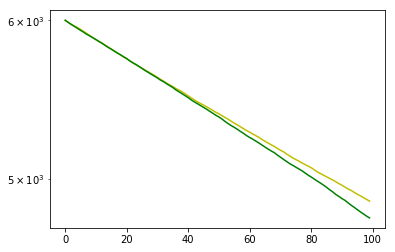

In [112]:
his = np.mean([IGD_wr_task3(y, A)[1] for c in range(200)],axis=0)
her = np.mean([IGD_wo_task3(y, A)[1] for c in range(200)],axis=0)

plt.semilogy(his,color='y')
plt.semilogy(her,color='g')

plt.show()
# plt.plot(IGD_wr_task3(y, A)[1],color='y')
# plt.plot(IGD_wo_task3(y, A)[1],color='g')
# plt.show()

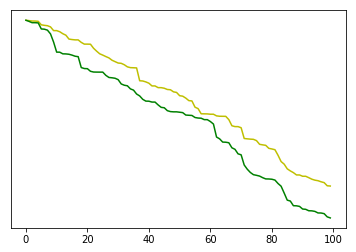

In [115]:
conver_his = np.array([np.linalg.norm(x - xstar) for x in IGD_wr_task3(y, A)[2]])
conver_her = np.array([np.linalg.norm(x - xstar) for x in IGD_wo_task3(y, A)[2]])
plt.semilogy(conver_his,color='y')
plt.semilogy(conver_her,color='g')

plt.show()

In [ ]:
# Conclusion: IGD without replacement performs better.